https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb <br/>
https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, f1_score 
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split,cross_val_score, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Training and visualizing

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree

url= "brain_stroke_in_numeric_without_useless_data.csv"
brain = pd.read_csv(url)
brain = brain.drop(brain.columns[0], axis=1)
brain_pca = pd.read_csv('brain_stroke_after_pca.csv')
brain_pca = brain_pca.drop(brain_pca.columns[0], axis=1) 
print(brain)

      gender   age  hypertension  heart_disease  ever_married  \
0          0  67.0             0              1             1   
1          0  80.0             0              1             1   
2          1  49.0             0              0             1   
3          1  79.0             1              0             1   
4          0  81.0             0              0             1   
...      ...   ...           ...            ...           ...   
4976       0  41.0             0              0             0   
4977       0  40.0             0              0             1   
4978       1  45.0             1              0             1   
4979       0  40.0             0              0             1   
4980       1  80.0             1              0             1   

      avg_glucose_level   bmi  smoking_status  stroke  
0                228.69  36.6               2       1  
1                105.92  32.5               1       1  
2                171.23  34.4               3      

In [3]:
# Test accuracy with avg_glucose_level and bmi

In [4]:
X = brain.iloc[:, [5,6]].to_numpy()
y = brain.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


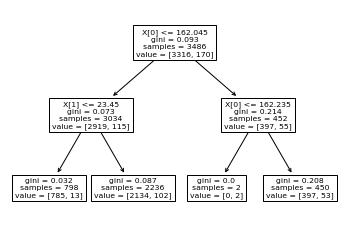

In [5]:
plot_tree(tree_clf);

In [6]:
# Test accuracy with age and avg_glucose_level

In [7]:
X = brain.iloc[:, [1,5]].to_numpy()
y = brain.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


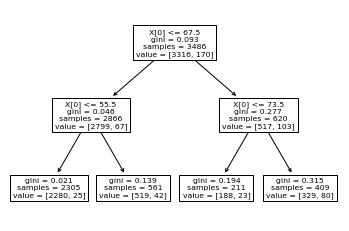

In [8]:
plot_tree(tree_clf);

In [9]:
# Test accuracy with age and bmi

In [10]:
X = brain.iloc[:, [1,6]].to_numpy()
y = brain.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


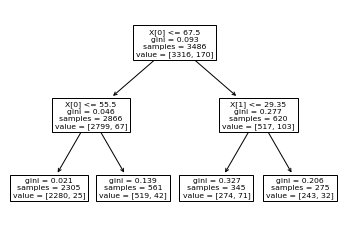

In [11]:
plot_tree(tree_clf);

In [12]:
# Test accuracy with pca 

In [13]:
X = brain_pca.iloc[:, [0,1]].to_numpy()
y = brain_pca.iloc[:, 2].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


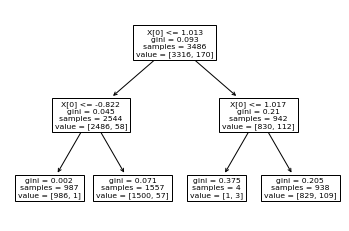

In [14]:
plot_tree(tree_clf);

In [15]:
# We are using the PCA because more simple to use, and this dataset summarize the best of all the features in the dataset 
# We are not printing the plot see in the tutorial because they are not relevant with our dataset

In [16]:
class EnsembleClassifier():

    def __init__(self,base_classifier,labels):
        self.classifier = [base_classifier]
        self.labels = labels
    def add_classifier(self,classifier):
        self.classifier.append(classifier)
    def remove_last_classifier(self):
        self.classifier.pop(-1)
    def predict_proba(self,X):
        return np.array([clf.predict_proba(X) for clf in self.classifier]).sum(axis=0)/len(self.classifier)
    def predict(self,X):
        return labels[np.argmax(self.predict_proba(X),axis=1)]
    def error(self,X,y):
        return 1 - accuracy_score(y,ensembleClassifier.predict(X))

class Artificial_data():

    def __init__(self,X,y,dtypes):
        self.dtypes = {}
        self._generator = {}
        self.labels = y.unique()
        for c, dtype in zip(X.columns, dtypes):
            self.dtypes[c] = dtype
            if dtype == 'numeric':
                self._generator[c] = {'mean':X[c].mean(),'std':X[c].std()}
            else:
                unique_values = X[c].value_counts() / X.shape[0]
                self._generator[c] = {'values':unique_values.index,'prob':unique_values.values}

    def sample_generator(self,ensembleClasifier,nb_samples=1):
        syn_X = pd.DataFrame()
        for c in self.dtypes.keys():
            if self.dtypes[c] == 'numeric':
                syn_X[c] = np.random.normal(self._generator[c]['mean'],self._generator[c]['std'],nb_samples)
            else:
                syn_X[c] = np.random.choice(self._generator[c]['values'],p=self._generator[c]['prob'],
                                             size=nb_samples,replace=True)
        p_hat = ensembleClassifier.predict_proba(syn_X)
        p_hat[p_hat==0] = 1e-5
        inverse_p = 1/p_hat
        new_p = inverse_p / inverse_p.sum(axis=1)[:, np.newaxis]
        syn_y = [np.random.choice(self.labels,p=new_p[i]) for i in range(nb_samples)]
        return syn_X,syn_y  



In [17]:
# C4.5 algorithm made by Basit 

In [18]:
X = brain_pca.iloc[:, [0,1]]
y = brain_pca.iloc[:, 2]

X_train_base, X_test, y_train_base, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtypes=['numeric' for _ in range(2)]
np.random.seed(1)
artifical_data = Artificial_data(X_train_base, y_train_base, dtypes)

c_size = 15
i_max = 300 
R_size = len(X_train_base)
i = 1
trails =1
labels = np.unique(y_train_base)
clf = DecisionTreeClassifier(random_state = 1, max_depth=2)
clf.fit(X_train_base, y_train_base)


ensembleClassifier = EnsembleClassifier(clf,labels)
error_bst = ensembleClassifier.error(X_train_base, y_train_base)

while (i < c_size and trails < i_max):
    X_syn, y_syn = artifical_data.sample_generator(ensembleClassifier, R_size)
    X_train = pd.concat([X_train_base, X_syn], axis = 0)
    y_train = np.append(y_train_base, y_syn, axis = 0)

    C_prime = DecisionTreeClassifier(random_state = 1, max_depth = 2)
    y_pred = C_prime.fit(X_train, y_train)

    ensembleClassifier.add_classifier(C_prime)

    error_i = ensembleClassifier.error(X_train_base, y_train_base)

    if error_i <= error_bst:
        print('improvement')
        error_bst = error_i
        print(error_i)
        i += 1
    else:
        ensembleClassifier.remove_last_classifier()

    trails +=1



improvement
0.048192771084337394
improvement
0.048192771084337394
improvement
0.048192771084337394


In [19]:
# C4.5 algorithm apply with the chefboost library 

In [21]:
from chefboost import Chefboost as chef

config = {'algorithm': 'C4.5'}

model = chef.fit(brain_pca, config=config, target_label = "stroke")

[INFO]:  3 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  0.6128432750701904  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.049789198956032926
MSE:  0.049789198956032926
RMSE:  0.22313493441420804
RAE:  1.0
RRSE:  1.0258645408635299
Mean:  0.049789198956032926
MAE / Mean:  100.0 %
RMSE / Mean:  448.1593178698267 %


In [22]:
# 10-fold cross-validation on the training set 

In [24]:
# kf = KFold(n_splits=10)
# score = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
# print("Cross Validation Scores are {}".format(score))
# print("Accuracy Cross Validation score :{}".format(score.mean()))
# y_train_pred = cross_val_predict(model, X_train, y_train, cv=kf)
# tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
# print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
# print(precision_score(y_train, y_train_pred))
# print(recall_score(y_train, y_train_pred))

In [25]:
# Basic decision tree with no parameters

In [26]:
X = brain_pca.iloc[:, [0,1]]
y = brain_pca.iloc[:, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9170568561872909


In [27]:
print("train:", tree_clf.score(X_train, y_train))
print("test:", tree_clf.score(X_test, y_test))
# overfitting

train: 1.0
test: 0.9170568561872909


In [28]:
# 10-fold cross validation on basic tree
kf = KFold(n_splits=10)
score = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.9079060040180483
TN: 3154, FP: 162, FN: 159, TP: 11
Precision: 0.06358381502890173
Recall: 0.06470588235294118
f1 score: 0.0641399416909621


In [29]:
# find the best alpha for our data

In [30]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [31]:
# from https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
tree_clfs = []
for ccp_alpha in ccp_alphas:
    tree_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree_clf.fit(X_train, y_train)
    tree_clfs.append(tree_clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        tree_clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0036422095042556724


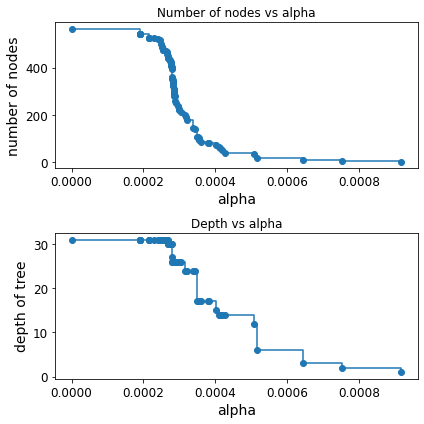

In [32]:
# from https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
tree_clfs = tree_clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [tree_clf.tree_.node_count for tree_clf in tree_clfs]
depth = [tree_clf.tree_.max_depth for tree_clf in tree_clfs]
fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

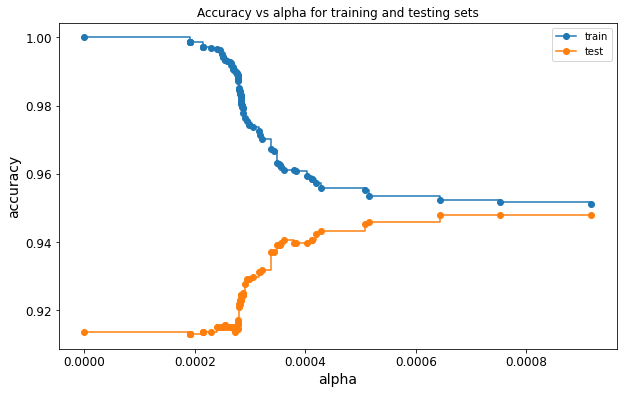

In [33]:
train_scores = [tree_clf.score(X_train, y_train) for tree_clf in tree_clfs]
test_scores = [tree_clf.score(X_test, y_test) for tree_clf in tree_clfs]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [34]:
# tree with the best alpha found

In [35]:
tree_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0004)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.939799331103679


In [36]:
# 10-fold cross validation on tree with alpa = 0.0004
kf = KFold(n_splits=10)
score = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.9320085301188948
TN: 3242, FP: 74, FN: 163, TP: 7
Precision: 0.08641975308641975
Recall: 0.041176470588235294
f1 score: 0.05577689243027889


In [37]:
# comparing the max_depth

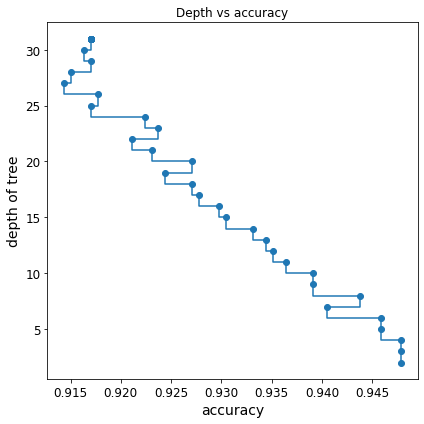

In [38]:
tree_clfs = []
accuracies = []
for depth in range(2,100):
    tree_clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
    tree_clfs.append(tree_clf)
    accuracies.append(metrics.accuracy_score(y_test, y_pred))
depth_tree = [tree_clf.tree_.max_depth for tree_clf in tree_clfs]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(accuracies, depth_tree, marker="o", drawstyle="steps-post")
ax.set_xlabel("accuracy")
ax.set_ylabel("depth of tree")
ax.set_title("Depth vs accuracy")
fig.tight_layout()

In [39]:
# tree with the max_depth = 4

In [40]:
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=4)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


In [41]:
# 10-fold cross validation on tree with max_depth = 4
kf = KFold(n_splits=10)
score = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.9489320883970622
TN: 3308, FP: 8, FN: 170, TP: 0
Precision: 0.0
Recall: 0.0
f1 score: 0.0


In [42]:
# tree with the max_depth = 15, because 15 is the depth for alpha = 0.0004 on the alpha vs depth graph 

In [43]:
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=15)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9304347826086956


In [44]:
# 10-fold cross validation on tree with max-depth = 15
kf = KFold(n_splits=10)
score = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.9251202121002537
TN: 3218, FP: 98, FN: 163, TP: 7
Precision: 0.06666666666666667
Recall: 0.041176470588235294
f1 score: 0.05090909090909091


In [45]:
# test decision tree with  with max-depth = 15 and alpha = 0.0004

In [46]:
tree_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0004, max_depth=15)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.939799331103679


In [47]:
# 10-fold cross validation on tree with max-depth = 15 + alpha = 0.0004
kf = KFold(n_splits=10)
score = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.9368828837730133
TN: 3260, FP: 56, FN: 164, TP: 6
Precision: 0.0967741935483871
Recall: 0.03529411764705882
f1 score: 0.05172413793103448


In [48]:
# splitting criteria by default is on "best"

In [49]:
tree_clf = DecisionTreeClassifier(random_state=42, splitter="best")
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9170568561872909


In [50]:
# 10-fold cross validation on tree with splitter="best"
kf = KFold(n_splits=10)
score = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.9079060040180483
TN: 3154, FP: 162, FN: 159, TP: 11
Precision: 0.06358381502890173
Recall: 0.06470588235294118
f1 score: 0.0641399416909621


In [51]:
# if we set splitting criteria to "random"

In [52]:
tree_clf = DecisionTreeClassifier(random_state=42, splitter="random")
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9110367892976589


In [53]:
# 10-fold cross validation on tree with splitter="random"
kf = KFold(n_splits=10)
score = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.9110718637815761
TN: 3159, FP: 157, FN: 153, TP: 17
Precision: 0.09770114942528736
Recall: 0.1
f1 score: 0.09883720930232559


In [54]:
# try random splitter + alpha = 0.004 + max_depth = 15

In [55]:
tree_clf = DecisionTreeClassifier(random_state=42, splitter="random", ccp_alpha=0.0004, max_depth=15)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


In [56]:
# 10-fold cross validation on tree with splitter="random" + alpha = 0.0004 + max_depth = 15
kf = KFold(n_splits=10)
score = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.9506521094753483
TN: 3314, FP: 2, FN: 170, TP: 0
Precision: 0.0
Recall: 0.0
f1 score: 0.0


In [57]:
# compare the min samples leaf

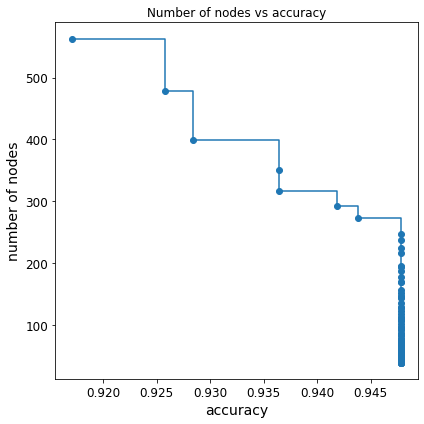

In [58]:
tree_clfs = []
accuracies = []
for leaf in range(1,100):
    tree_clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=leaf)
    y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
    tree_clfs.append(tree_clf)
    accuracies.append(metrics.accuracy_score(y_test, y_pred))

node_counts = [tree_clf.tree_.node_count for tree_clf in tree_clfs]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(accuracies, node_counts, marker="o", drawstyle="steps-post")
ax.set_xlabel("accuracy")
ax.set_ylabel("number of nodes")
ax.set_title("Number of nodes vs accuracy")
fig.tight_layout()

In [59]:
# try with min 300 node

In [60]:
tree_clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=300)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


In [61]:
# 10-fold cross validation on tree with leaf = 300
kf = KFold(n_splits=10)
score = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.9512268221190265
TN: 3316, FP: 0, FN: 170, TP: 0
Precision: 0.0
Recall: 0.0
f1 score: 0.0


/home/lia/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
# try with 200 node

In [63]:
tree_clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=200)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


In [64]:
# 10-fold cross validation on tree with leaf = 200
kf = KFold(n_splits=10)
score = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.9512268221190265
TN: 3316, FP: 0, FN: 170, TP: 0
Precision: 0.0
Recall: 0.0
f1 score: 0.0


/home/lia/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
# try with 20 node

In [66]:
tree_clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


In [67]:
# 10-fold cross validation on tree with leaf = 100
kf = KFold(n_splits=10)
score = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.9512268221190265
TN: 3316, FP: 0, FN: 170, TP: 0
Precision: 0.0
Recall: 0.0
f1 score: 0.0


/home/lia/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
# compare the min samples leaf, tryed with max-depth = 15 

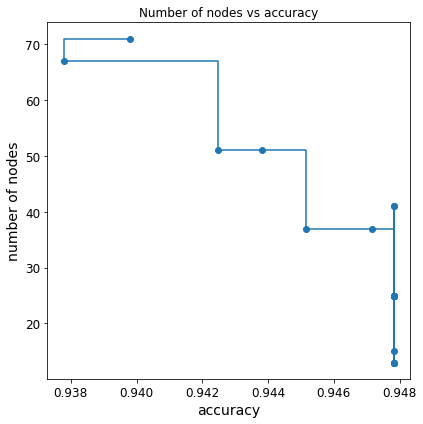

In [69]:
tree_clfs = []
accuracies = []
for leaf in range(1,20):
    tree_clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=leaf, ccp_alpha=0.0004, max_depth=15)
    y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
    tree_clfs.append(tree_clf)
    accuracies.append(metrics.accuracy_score(y_test, y_pred))

node_counts = [tree_clf.tree_.node_count for tree_clf in tree_clfs]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(accuracies, node_counts, marker="o", drawstyle="steps-post")
ax.set_xlabel("accuracy")
ax.set_ylabel("number of nodes")
ax.set_title("Number of nodes vs accuracy")
fig.tight_layout()

In [70]:
# try with 20 node + alpha = 0.004 + max_depth = 15

In [71]:
tree_clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20, ccp_alpha=0.0004, max_depth=15)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


In [72]:
# 10-fold cross validation on tree with leaf = 20 + alpha + depth
kf = KFold(n_splits=10)
score = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.9512268221190265
TN: 3316, FP: 0, FN: 170, TP: 0
Precision: 0.0


/home/lia/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.0
f1 score: 0.0


In [73]:
# try with 10 node + alpha = 0.004 + max_depth = 15

In [74]:
tree_clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=10, ccp_alpha=0.0004, max_depth=15)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


In [75]:
# 10-fold cross validation on tree with leaf = 10 + alpha + depth
kf = KFold(n_splits=10)
score = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.950940289167737
TN: 3314, FP: 2, FN: 169, TP: 1
Precision: 0.3333333333333333
Recall: 0.0058823529411764705
f1 score: 0.011560693641618498


In [76]:
# try with 5 node + alpha = 0.004 + max_depth = 15

In [77]:
tree_clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=5, ccp_alpha=0.0004, max_depth=15)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9451505016722408


In [78]:
# 10-fold cross validation on tree with leaf = 5 + alpha + depth
kf = KFold(n_splits=10)
score = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.9443426209531338
TN: 3292, FP: 24, FN: 170, TP: 0
Precision: 0.0
Recall: 0.0
f1 score: 0.0


In [79]:
# try with 2 node + alpha = 0.004 + max_depth = 15

In [80]:
tree_clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=2, ccp_alpha=0.0004, max_depth=15)
y_pred = tree_clf.fit(X_train, y_train).predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.9592656339644291


In [81]:
# 10-fold cross validation on tree with leaf = 5 + alpha + depth
kf = KFold(n_splits=10)
score = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.9386012581102001
TN: 3266, FP: 50, FN: 164, TP: 6
Precision: 0.10714285714285714
Recall: 0.03529411764705882
f1 score: 0.05309734513274336


In [82]:
# tree 1

In [83]:
X = brain_pca.iloc[:, [0,1]]
y = brain_pca.iloc[:, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0004, max_depth=15)
tree_clf.fit(X_train, y_train)
print("train:", tree_clf.score(X_train, y_train))
print("test:", tree_clf.score(X_test, y_test))

train: 0.9583333333333334
test: 0.9398194583751254


In [84]:
# tree 2

In [85]:
X = brain_pca.iloc[:, [0,1]]
y = brain_pca.iloc[:, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0004, max_depth=15)
tree_clf.fit(X_train, y_train)
print("train:", tree_clf.score(X_train, y_train))
print("test:", tree_clf.score(X_test, y_test))

train: 0.9592656339644291
test: 0.939799331103679


In [86]:
X = brain_pca.iloc[:, [0,1]]
y = brain_pca.iloc[:, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

tree_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0004, max_depth=15)
tree_clf.fit(X_train, y_train)
print("train:", tree_clf.score(X_train, y_train))
print("test:", tree_clf.score(X_test, y_test))

train: 0.9754016064257028
test: 0.9227166276346604


In [87]:
# Applied a random forest classifier

In [88]:
X = brain_pca.iloc[:, [0,1]]
y = brain_pca.iloc[:, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf3=RandomForestClassifier(n_estimators=100)
clf3.fit(X_train,y_train)
y_pred=clf3.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9418060200668896


In [89]:
# 10-fold cross validation on random forest
kf = KFold(n_splits=10)
score = cross_val_score(clf3, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy Cross Validation score :{}".format(score.mean()))
y_train_pred = cross_val_predict(clf3, X_train, y_train, cv=kf)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("f1 score:", f1_score(y_train, y_train_pred))

Accuracy Cross Validation score :0.9463508217238086
TN: 3292, FP: 24, FN: 167, TP: 3
Precision: 0.1111111111111111
Recall: 0.01764705882352941
f1 score: 0.030456852791878174
